In [1]:
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [45]:
# накидываем тысячу точек от -3 до 3
x = np.linspace(-3, 3, 1000).reshape(-1, 1)

In [46]:
def f(x):
    return x * np.sin(x * 2 * np.pi) if x < 0 else -x * np.sin(x * np.pi) + np.exp(x / 2) - np.exp(0)

f = np.vectorize(f)

y = f(x)

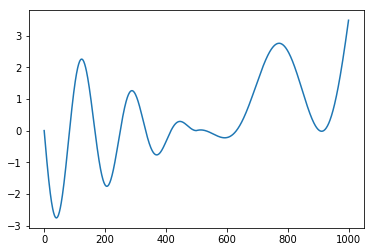

In [47]:
plt.plot(y);

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [27]:
def baseline_model():
    model = Sequential()
    model.add(Dense(50, input_dim=1, activation='tanh'))#, init='he_normal'
    model.add(Dense(50, input_dim=50, activation='tanh'))
    model.add(Dense(1, input_dim=50, activation='linear'))
    
    sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

In [48]:
def baseline_model():
    model = Sequential()
    model.add(Dense(20, input_dim=1, activation='tanh'))
    model.add(Dense(1, input_dim=20, activation='linear'))
    
    sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

In [49]:
# тренируем сеть
model = baseline_model()
model.fit(x, y, epochs=400, verbose = 0)

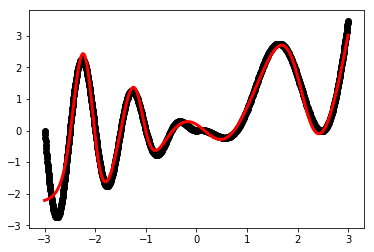

In [50]:
# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(x), color='red', linewidth=3, antialiased=True)
plt.show()

### Упражнение 1.
* Зависимость от числа нейронов (1,5,20,100)
* Зависимость от числа эпох в обучении (20,50,100,200,400,800,4000)

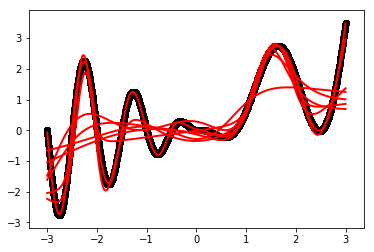

In [54]:
# зависимость от числа эпох
for i in [20,50,100,200,400,800,4000]:
    model = baseline_model()
    model.fit(x, y, epochs=i, verbose = 0)
    plt.scatter(x, y, color='black', antialiased=True)
    plt.plot(x, model.predict(x), color='red', linewidth=2, antialiased=True)
plt.show()

In [56]:
def baseline_model(i):
    model = Sequential()
    model.add(Dense(i, input_dim=1, activation='tanh'))
    model.add(Dense(1, input_dim=20, activation='linear'))
    
    sgd = SGD(lr=0.01, momentum=0.9, nesterov=True) # learning rate here
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

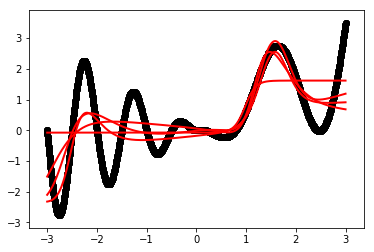

In [58]:
# зависимость от числа нейронов
for i in [1,5, 20,100]:
    model = baseline_model(i)
    model.fit(x, y, epochs=200, verbose = 0)
    plt.scatter(x, y, color='black', antialiased=True)
    plt.plot(x, model.predict(x), color='red', linewidth=2, antialiased=True)
plt.show()